In [1]:
# data wrangling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats
from scipy import stats

In [2]:
df= pd.read_csv("data/price-units-data.csv")

### Simple linear regression for one type of product

We carry out a linear regression for each of the 27 product_id's to obtain their price elasticty which can tell us how much a product units change given the change in price

In [3]:
def price_units_arrays(df,product_id):
    """Creates an array for the price and units data to feed the linear regression model
    given the specific product_id."""
    
    single_product = df[df["product_id"]==product_id]
    X = single_product['price']
    y = single_product['units']
    X_array, y_array = X.to_numpy(), y.to_numpy()
    
    return X_array, y_array


In [4]:
# Dictionary to append the results from the linear regression
results_values = {
    "product_id": [],
    "price_elasticity": [],
    "price_mean": [],
    "units_mean": [],
    "slope": [],
    "intercept": [],
    "r_score":[],
    "coefficient_pvalue" : [],
}

In [5]:
for product in range(df.product_id.max()+1):

    x,y = price_units_arrays(df,product)
    # Use linregress from stats to obtain the coeficients and metrics.
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    mean_price = np.mean(x)
    mean_units = np.mean(y)
    
    price_elasticity = round(slope * (mean_price/mean_units),6)

    #Append results into dictionary for dataframe
    results_values["product_id"].append(product)
    results_values["price_elasticity"].append(price_elasticity)
    results_values["price_mean"].append(mean_price)
    results_values["units_mean"].append(mean_units)
    results_values["slope"].append(slope)
    results_values["intercept"].append(intercept)
    results_values['r_score'].append(r_value)
    results_values["coefficient_pvalue"].append(p_value)

Dictionary to data frame

In [6]:
final_df = pd.DataFrame.from_dict(results_values)

In [7]:
# Check which products are predicted to be innelastic
len(final_df[final_df["price_elasticity"]> -1])

19

We get 19 innelastic products (change in units not affected by large changes in prices). However, the small r_score and large p_value of most of these products tells us that the data doesn't fit well to the model.

In [8]:
final_df[final_df["price_elasticity"]> -1].head(10)

,product_id,price_elasticity,price_mean,units_mean,slope,intercept,r_score,coefficient_pvalue
0,0,-0.259934,4.602,1270.1,-71.738715,1600.241569,-0.253920,0.478999
1,1,-0.053947,3.917,1431.3,-19.712589,1508.514211,-0.226420,0.529327
2,2,0.025723,4.583,1383.9,7.767519,1348.301461,0.035538,0.922359
3,3,-0.154109,5.998,1254.6,-32.234875,1447.944779,-0.419740,0.227203
4,4,-0.303310,4.269,1502.6,-106.758871,1958.353619,-0.781893,0.007537
5,5,-0.496343,1.728,1457.1,-418.530826,2180.321267,-0.407066,0.243003
6,6,-0.871016,6.209,1017.8,-142.779773,1904.319613,-0.630561,0.050636
8,8,-0.045319,4.019,1465.9,-16.529678,1532.332777,-0.085949,0.813369
10,10,-0.494794,7.107,1246.9,-86.810065,1863.859131,-0.767251,0.009589
12,12,-0.104526,5.570,1367.5,-25.662276,1510.438876,-0.288524,0.418823


We select only the products with p_value < 0.05.

In [9]:
lg_df = final_df[final_df["coefficient_pvalue"]<0.05]

In [10]:
lg_df 

,product_id,price_elasticity,price_mean,units_mean,slope,intercept,r_score,coefficient_pvalue
4,4,-0.303310,4.269000,1502.600000,-106.758871,1958.353619,-0.781893,0.007537
7,7,-2.922558,7.131429,714.428571,-292.782700,2802.387487,-0.860377,0.012959
9,9,-1.627362,6.720000,741.500000,-179.566773,1948.188713,-0.679246,0.030758
10,10,-0.494794,7.107000,1246.900000,-86.810065,1863.859131,-0.767251,0.009589
11,11,-1.980832,6.221000,850.300000,-270.744477,2534.601394,-0.721164,0.018585
13,13,-0.702318,4.311000,1545.100000,-251.716977,2630.251886,-0.847016,0.001984
14,14,-3.669452,7.412500,679.250000,-336.252978,3171.725200,-0.821763,0.012331
17,17,-0.967618,4.658000,1238.100000,-257.193581,2436.107700,-0.730324,0.016460
19,19,-2.476234,7.392500,729.875000,-244.483142,2537.216624,-0.824916,0.011717
22,22,-2.534884,7.116000,679.400000,-242.018041,2401.600378,-0.830559,0.002923


Products: 4, 10, 13 and 17 have small elasticities, being 4 the smallest. The largest elasticity comes from the product 24. We merge the main data with the results to check the characteristics of these products.

In [11]:
#merging model results with main data
model_df = pd.merge(left = df, right = lg_df, how = 'inner', on="product_id")

In [12]:
model_df[model_df.product_id == 4].head()

,date,product_id,price,units,brand,flavour,volume_per_joghurt_g,packsize,price_elasticity,price_mean,units_mean,slope,intercept,r_score,coefficient_pvalue
0,2020-01-01,4,2.30,1692.0,Danone,straciatella,150,6,-0.30331,4.269,1502.6,-106.758871,1958.353619,-0.781893,0.007537
1,2020-01-02,4,3.60,1647.0,Danone,straciatella,150,6,-0.30331,4.269,1502.6,-106.758871,1958.353619,-0.781893,0.007537
2,2020-01-03,4,3.95,1457.0,Danone,straciatella,150,6,-0.30331,4.269,1502.6,-106.758871,1958.353619,-0.781893,0.007537
3,2020-01-04,4,5.47,1300.0,Danone,straciatella,150,6,-0.30331,4.269,1502.6,-106.758871,1958.353619,-0.781893,0.007537
4,2020-01-05,4,4.37,1540.0,Danone,straciatella,150,6,-0.30331,4.269,1502.6,-106.758871,1958.353619,-0.781893,0.007537


In [13]:
model_df[model_df.product_id == 24].head()

,date,product_id,price,units,brand,flavour,volume_per_joghurt_g,packsize,price_elasticity,price_mean,units_mean,slope,intercept,r_score,coefficient_pvalue
93,2020-01-01,24,7.12,1021.0,Rewe,raspberry,1000,6,-3.713776,7.448889,594.0,-296.149233,2799.98273,-0.718121,0.029332
94,2020-01-03,24,6.34,866.0,Rewe,raspberry,1000,6,-3.713776,7.448889,594.0,-296.149233,2799.98273,-0.718121,0.029332
95,2020-01-04,24,7.18,737.0,Rewe,raspberry,1000,6,-3.713776,7.448889,594.0,-296.149233,2799.98273,-0.718121,0.029332
96,2020-01-05,24,8.24,462.0,Rewe,raspberry,1000,6,-3.713776,7.448889,594.0,-296.149233,2799.98273,-0.718121,0.029332
97,2020-01-06,24,7.94,270.0,Rewe,raspberry,1000,6,-3.713776,7.448889,594.0,-296.149233,2799.98273,-0.718121,0.029332


Product 4 is a straciatella flavour from Danone in a pack size of 6 of 150g each.

Product 24 is a raspberry flavour from Rewe in a pack size of 6 og 1Kg each.

<AxesSubplot:xlabel='volume_per_joghurt_g', ylabel='price_elasticity'>

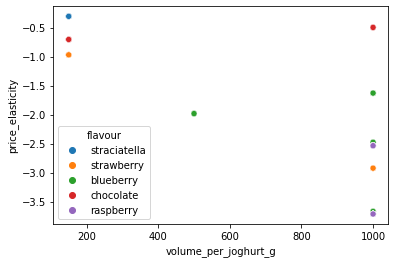

In [14]:
sns.scatterplot(x="volume_per_joghurt_g",y="price_elasticity",data = model_df, hue="flavour")

From the above plot we see that the innelastic products are mostly Chocolate and Straciatella flavour coming in small volumes of 150g. The strawberry is almost innelastic when it comes in small volumes and very elastic when sold in 1Kg presentation.
These observations agree with the results obtained in the multilinear regression analysis.